# 사물인터넷(Internet of Things)란?  
+ 각종 사물에 센서와 통신 기능을 내장하여 인터넷에 연결하는 기술  
+ 사물인터넷의 목표
  + 사물을 서로 연결하여 사물이 가진 특성을 지능화
  + 인간의 개입을 최소화하고 자동화 구현
  + 정보 융합으로 인간에게 지식과 더 좋은 서비스 제공

## 사물인터넷 응용 프로토콜

**대표적인 사물인터넷 프로토콜**  
+ HTTP(HyperText Transfer Protocol)
+ MQTT(Message Queueing Telemetry Transport)
+ CoAP(Constrained Application Protocol)  

<CoAP와 MQTT 프로토콜 스텍>
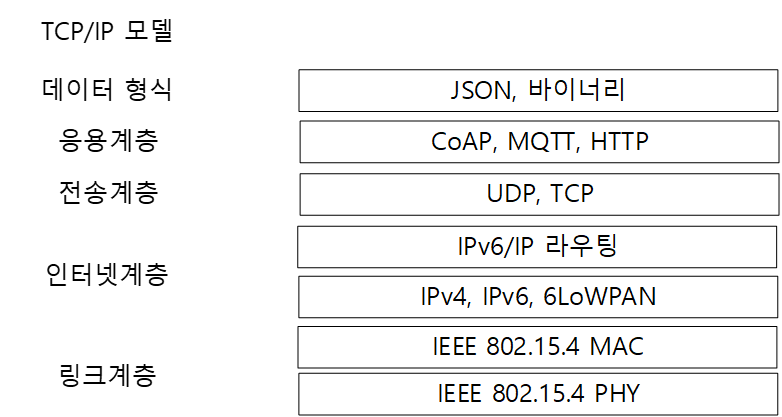

# HTTP를 이용한 사물인터넷 프로그래밍

## HTTP 프로토콜의 기본 동작  

+ 클라이언트(웹브라우저)가 서버에게 정보를 요청(HTTP request)하면 서버는 응답(HTTP response)를 전송하는 구조  
+ 클라이언트 요청은 URL(Uniform Resource Locator)로 구성되고 서버는 URL을 분해하여 요청 처리
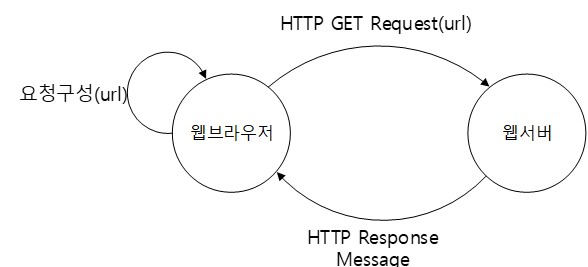


## urllib.parse 모듈을 사용한 URL 처리  
urllib는 URL을 처리하는 모듈이다.  
+ urllib.parse 모듈  
  URL을 분해하거나 결합하는 기능
+ urllib.request 모듈  
  서버에게 요청을 보내고 받는 기능  


+ URL 구성 요소  
```
url = "http://location/path;parameter?query=argument#frag"
```
  + http:            scheme
  + //location       서버의 주소
  + /path            자원의 경로
  + ;parameter       schme에 필요한 파라미터
  + ?query=argument  자원을 처리하거나 검색하기 위한 정보 문자열
  + #frag            웹페이지 내부의 섹션 식별자  

### URL 분해하기
urllib.parse.urlparse() 함수를 이용하여 URL을 ParseResult 객체로 분해한다  

<ParseResult 객체의 속성>  
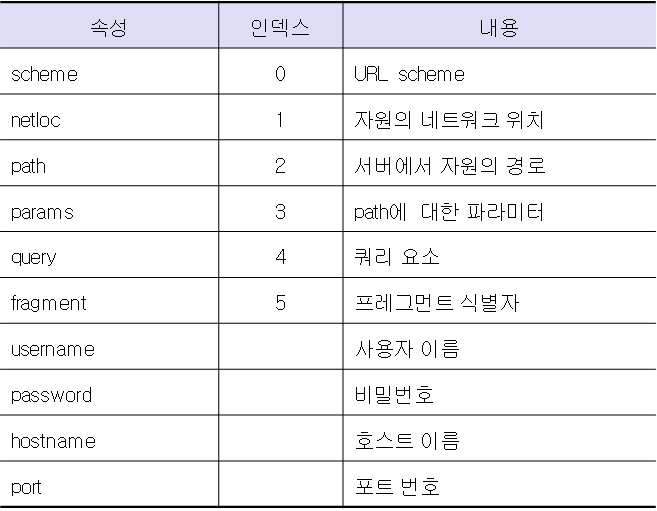

In [ ]:
from urllib import parse

#분해할 URL
url = "http://location/path;parameter?query=argument#frag"

#URL을 분해하여 ParseResult 객체로 반환
#PasrseResult 객체는 namedtuple 타입
p_url = parse.urlparse(url)
print(p_url)

**ParseResult 객체의 속성 확인하기**

In [ ]:
from urllib import parse

url = "http://location/path;parameter?query=argument#frag"
p_url = parse.urlparse(url)

print('scheme :', p_url.scheme) #scheme 속성
print('netloc :', p_url.netloc) #netloc 속성
print('path :', p_url.path) #path 속성
print('params :', p_url.params) #params 속성
print('query :', p_url.query) #query 속성
print('fragment:', p_url.fragment) #fragment 속성
print('username:', p_url.username) #username 속성
print('password:', p_url.password) #password 속성
print('hostname:', p_url.hostname) #hostname 속성
print('port :', p_url.port) #port 속성

### URL 결합하기
urljoin() 함수를 이용하여 두 개의 문자열을 URL로 구성  
```
urljoin(base_url_string, relative_url_string)
```
relative_url_string에서 빠진 부분을 base_url_string에서 보충하여 완전한 URL을 만든다

In [ ]:
from urllib import parse

new_url = parse.urljoin("http://host.com/path/rsc/1", "../other/rsc")
print('Joined URL:', new_url)

**URL 요소를 결합하여 URL 만들기**  
URL의 각 요소를 포함하는 튜플을 만들고 urlunparse() 함수를 사용하여 URL 생성

In [ ]:
from urllib.parse import urlunparse

# URL 요소
# 요소가 없으면 빈 문자열 할당
tuple_url = ('http', 'netloc', '/path', '','query=arg','')

# URL 요소 결합하기
url = urlunparse(tuple_url)
print('Encoded: ', url)

**[연습문제 13-1]**  
(1) urlparse() 함수를 사용하여 네이버 홈페이지의 로그인 화면의 URL을 분해하여 다음 각 요소를 확인하시오
	scheme
	netloc
	path
	path params
	query
	fragment

(2) urlunparse() 함수를 사용하여 "http://localhost/test?LED=ON" URL을 생성하는 프로그램을 작성하시오.

## urllib.request 모듈을 이용한 HTTP requests

urllib.request 모듈을 이용하여 GET request나 POST request를 할 수 있다 
* GET request  
  자원 요청
* POST request  
  자원 게시

### GET requests

urllib.request.urlopen(URL) 함수를 이용하여 서버로 GET 요청을 전달하고 응답을 받는다  

```
#GET 요청을 보내고 서버 응답(HTTPResponse 객체) 받기
response = request.urlopen(URL)

#응답의 헤더 정보
response.headers

#응답의 헤더와 값을 가져오기
response.getheaders()

#응답 내용 읽기
response.read()
```


In [ ]:
#urllib_request_urlopen.py
# GET request 보내기와 서버 응답 출력 프로그램

from urllib import request

# urlopen() 함수를 이용하여 GET request를 전달하고 서버 응답 수신
URL = 'https://www.dongyang.ac.kr/' #url
response = request.urlopen(URL) 
print('RESPONSE:', response) #response는 HTTPResponse 객체
print('URL :', response.url) #url 정보

#응답 헤더
headers = response.headers
print('DATE :', headers['date'])
print('HEADERS :')
print('---------')
print(headers)

#서버 응답 내용 읽기
data = response.read().decode() 
print('LENGTH :', len(data))
print('DATA :')
print('---------')
print(data)

**urllib.parse.urlencode()을 이용한 GET request의 query 생성하기**  

urllib.parse.urlencode() 함수를 사용하면 GET request의 query를 생성하여 요청 내용을 구체적으로 지정할 수 있다.  
+ urlencode()는 URL에 문자를 표현하는 퍼센트 인코딩을 반환
+ query에 한글이 포함되는 경우 ASCII로 나타내기 위해 필요

In [ ]:
#urllib_get_request.py
# GET request 발송 프로그램

from urllib import parse
from urllib import request

#query를 딕셔너리로 표현
query = {'name': 'YKSUH', 'position': 'professor'} 

#딕셔너리에서 query URL 생성
encoded_query = parse.urlencode(query) 
print('Encoded:', encoded_query)

url = 'http://localhost:8080/?' + encoded_query
#url = 'https://httpbin.org/get'
resp = request.urlopen(url)
print(resp.read().decode('utf-8'))

**[실행 방법]**  
GET 서버 프로그램(HTTP_GET_server.py)을 먼저 실행하고 urllib_get_request.py 클라이언트를 실행한다. 서버 응답에서 query가 어떻게 설정되었는지 확인해보자

### POST requests

urllib.request.urlopen(url, data=encoded_args) 함수를 사용하면 POST request를 전송하여 서버로 데이터를 보낼 수 있다.  
+ data  
  urlencode() 함수로 만들어진 전송 데이터

In [ ]:
#urllib_post_request.py
# POST request 발송 프로그램

from urllib import parse
from urllib import request

#POST 데이터 생성
data = {'tempeature': '25C', 'humidity': '60%'} 
encoded_data = parse.urlencode(data).encode('utf-8')

#POST request를 보내고 응답을 받는다
url = 'https://httpbin.org/post'
resp = request.urlopen(url, data=encoded_data)
print(resp.read().decode('utf-8'))

**[실행 방법]**  
프로그램을 실행하고 서버 응답에서 POST query가 서버에 게시되었는지 확인해보자

## requests 모듈을 사용한 GET/PUT/POST requests

urllib 모듈 대신 requests 모듈을 이용하여 HTTP requests 보내기  
+ requests 모듈을 설치해야 한다  

### GET requests

**기본적인 GET requests**  

In [ ]:
import requests

resp = requests.get("https://api.github.com/events")
print(resp)

**query를 포함하는 GET requests**

In [ ]:
import requests

data = {'key1': 'value1', 'key2': 'value2' }
resp = requests.get('https://httpbin.org/get', params=data)
print(resp.url)

**requests에 대한 서버 응답 속성**  
+ url, text, encoding, content, json(), raw, headers, status_code

In [ ]:
import requests

resp = requests.get('https://httpbin.org/get')
print("URL\n",resp.url) #url
print("\nText 응답\n",resp.text) #text 응답
print("\n인코딩 방법\n",resp.encoding)#인코딩 방법
print("\n바이너리 응답\n",resp.content) #바이너리 응답
print("\njson format 응답\n",resp.json()) #json 포맷으로 구성된 응답
print("\n상태 코드\n",resp.status_code)#상태 코드

### PUT requests

requests.put(URL, data)을 사용하여 기존 데이터를 갱신하는 PUT requests를 전송  
+ data: {'key':'value'}

In [ ]:
import requests

resp = requests.put('https://httpbin.org/put', data = {'key': 'value'})
print(resp.text)

### POST requests

requests.post(URL, data)을 사용하여 새로운 데이터를 추가하는 POST requests를 전송  
+ data: {'key':'value'}

In [ ]:
import requests

data = {'key1': 'value1', 'key2': 'value2'}
resp = requests.post("https://httpbin.org/post", data=data)
print(resp.text)

**json을 이용한 POST requests**  
+ data = json.dumps(payload) 
+ json=payload

In [ ]:
import requests
import json
url = 'https://httpbin.org/post' #POST 서버
payload = ['some', 'data']
resp1 = requests.post(url, data=json.dumps(payload)) #json.dumps() 함수 사용
resp2 = requests.post(url, json=payload) #json 인수 지정
print(resp1.text)
print(resp2.text)

#### POST requests를 이용한 ThingSpeak IoT 구현하기

HTTP나 MQTT 프로토콜을 사용하여 사물에서 클라우드로 데이터를 저장하고 검색할 수 있는 ThingSpeak에 데이터를 포스팅하기  

다음 순서로 ThingSpeak에 채널을 개설한다  
1. https://thingspeak.com/에 접속한다.
2. [Get Started For Free]를 클릭한다.
3. 로그인한다. 계정이 없으면 새 계정을 만들어 접속한다.
4. My channels > New channel을 클릭하고 Name(그림 13-3)에 적당한 채널 이름을 입력하고, Field 항목 오른쪽에 체크를 하고 이름을 입력한다. Field 입력을 마치면 \[Save Channel]을 클릭한다
5. 채널(그림 13-4)에서 <API keys> 탭 항목을 클릭하여 "Read API Key"와 "Write API Keys"를 확인한다.

**라즈베리파이의 CPU 온도를 ThingSpeak로 전송하고 온도 그래프를 확인하기**  
  
+ CPU 온도: open('/sys/class/thermal/thermal_zone0/temp').read() 함수
+ 전송 데이터  
  payload = {'field1': temp, 'key': key}
+ ThingSpeak에 데이터 포스팅  
  requests.post('http://api.thingspeak.com/update', data=payload)

In [ ]:
#thingspeak-rpi-requests.py
# program to post data on ThingSpeak using requests module

import time, requests
import random

# 사용자 Write API Key
key = "LG2FO1N2ZGZVGX8O"  

def thermometer():
    while True:
        #Calculate CPU temperature of Raspberry Pi in Degrees C
        temp = int(open('/sys/class/thermal/thermal_zone0/temp').read()) / 1e3 # Get Raspberry Pi CPU temp
        #temp = random.randint(30, 50) #random data

        #전송 데이터 준비
        payload = {'field1': temp, 'api_key': key} #payload to post

        #데이터 포스팅하기
        try:
            response = requests.post('http://api.thingspeak.com/update', data=payload)
            print(temp)
            print(response.status_code, response.reason)
            print(response.text)
        except:
            print("connection failed")
        break

if __name__ == "__main__":
        while True:
                thermometer()
                time.sleep(20)

**[실행 방법]**  
라즈베리파이에서 프로그램을 실행한 후, thingspeak.com에서 Channels > My Channels > Private에서 +Add Visualizations를 클릭하여 Field 1 Chart 그래프를 선택하고 \<Save>한다
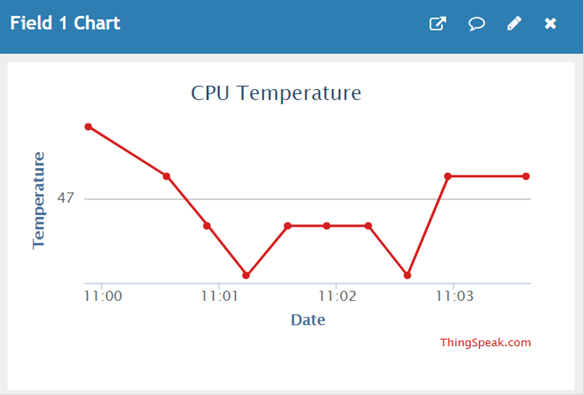

# HTTP 서버 구현하기

HTTP 서버를 구현하기 위해 http.server 모듈을 사용한다.  
+ 서버 구현에 필요한 팩토리 클래스와 프로토콜 클래스는 다음 클래스 사용 
  + 팩토리 클래스
    + HTTPServer
  + 프로토콜 클래스
    + BaseHTTPRequestHandler
  
+ HTTP의 GET/POST/PUT/DELETE request는 각각 프로토콜 클래스의 do_GET(), do_POST(), do_PUT(), do_DELETE() 메서드로 처리
+ HTTP request에 대한 헤더 응답
```
send_response(200)
send_header(('Content-Type', 'text/plain; charset=utf-8')
end_headers() 
```
+ BaseHTTPRequestHandler 클래스의 인스턴스 변수
  + headers: HTTP 요청 헤더를 분석하고 관리하는 인스턴스 변수
  + rfile: 입력 스트림
  + wfile: 출력 스트림

**HTTP 서버의 기본 구조**  
```
from http.server import HTTPServer, BaseHTTPRequestHandler
from urllib import parse

class Handler(BaseHTTPRequestHandler): ❸
    def do_GET(self):
	………
    def do_POST(self):
	………

server = HTTPServer(('localhost', 8080), Handler) #HTTPServer 객체 생성 ❶
server.serve_forever() #Server 시작 ❷
```

In [ ]:
#dummy_web_server.py
#간단한 Web 서버

from http.server import HTTPServer, BaseHTTPRequestHandler
from io import BytesIO


class SimpleHTTPRequestHandler(BaseHTTPRequestHandler):

    def do_GET(self):
        #GET 요청에 대한 응답 전송
        self.send_response(200) #헤더 송신
        self.end_headers()
        
        self.wfile.write(b'Hello, world!') #응답 메시지

    def do_POST(self):       
        #응답 헤더 전송
        self.send_response(200) 
        self.end_headers()
        
        #응답 메시지 전송
        content_length = int(self.headers['Content-Length'])
        body = self.rfile.read(content_length) #요청 내용을 읽어온다
        response = BytesIO()#응답을 바이트 스트림에 저장
        response.write(b'POST request: ')
        response.write(b'Response: ')
        response.write(body) #요청 내용을 응답에 추가
        self.wfile.write(response.getvalue()) #응답 전송

#서버 객체 생성
httpd = HTTPServer(('', 8080), SimpleHTTPRequestHandler)
httpd.serve_forever() #서버 실행

**[실행 방법]**  
dummy_web_server.py를 실행하고 웹브라우저에서 “localhost:8080”을 입력하면 “Hello world!” 메시지를 볼 수 있다. 또 앞에서 설명한 “urllib_post_request.py”를 실행하면 POST request에 대한 응답을 다음과 같이 볼 수 있다
```
POST request: Response: tempeature=25C&humidity=60%25
```

## HTTP GET 서버

HTTP GET 서버는 GET request를 처리하는 서버
+ 프로토콜 클래스의 do_GET(self) 메서드로 구현
  1. 응답 메시지를 준비
  2. 응답 헤더 전송
```
self.send_response(200)
self.send_header('Content-Type','text/plain; charset=utf-8')
self.end_headers()
```
  3. 응답 메시지 전송
  ```
  self.wfile.write(message.encode('utf-8'))
  ```

In [ ]:
#HTTP_GET_server.py
# HTTP GET 요청을 처리하는 서버 프로그램

from http.server import BaseHTTPRequestHandler
from urllib import parse

#프로토콜 클래스
class GetHandler(BaseHTTPRequestHandler):
    def do_GET(self):
        #URL 요청을 분석
        parsed_path = parse.urlparse(self.path)
        
        #응답 메시지의 기본 구성
        #self.xxx는 BaseHTTPRequestHandler의 속성이다
        message_parts = [
            'CLIENT VALUES:',
            'client_address={} ({})'.format(
                self.client_address, #(host, port)
                self.address_string()), #클라이언트 주소 반환
            'command={}'.format(self.command), #요청 유형
            'path={}'.format(self.path), #요청 URL
            'real path={}'.format(parsed_path.path), #요청 URL의 path 정보
            'query={}'.format(parsed_path.query), #요청 URL의 query 정보
            'request_version={}'.format(self.request_version), #요청의 버전, HTTP/1.0
            '',
            'SERVER VALUES:',
            'server_version={}'.format(self.server_version), #서버 소프트웨어 버전, BaseHTTP/0.2
            'sys_version={}'.format(self.sys_version), #파이썬 시스템 버전
            'protocol_version={}'.format(self.protocol_version), #HTTP 프로토콜 버전, HTTP/1.0
            '',
            'HEADERS RECEIVED:',
        ]
        
        #요청 헤더 정보를 포함하여 응답 메시지 구성
        for name, value in sorted(self.headers.items()):
            message_parts.append(
                '{}={}'.format(name, value.rstrip())
            )
        message_parts.append('')
        message = '\r\n'.join(message_parts)
        
        #응답 헤더 전송
        self.send_response(200)
        self.send_header('Content-Type', 'text/plain; charset=utf-8')
        self.end_headers()
        
        #응답 메시지 전송
        self.wfile.write(message.encode('utf-8'))

In [ ]:
if __name__ == '__main__':
    from http.server import HTTPServer
    
    #팩토리 클래스를 이용하여 서버를 생성하고 실행
    server = HTTPServer(('', 8080), GetHandler)
    print('Starting server, use <Ctrl-C> to stop')
    server.serve_forever()

**Query 처리 HTTP GET 서버**  
URL의 query가 "led=on" 이면 "LED is ON"을 전송하고 "led=off"이면 "LED is OFF"을 전송하는 서버 프로그램을 구현  
1. parse.urlparse(self.path)로 URL 분해
2. parse.parse_qs(query)로 query를 딕셔너리로 분해
3. 딕셔너리로 분해된 query를 해석하여 응답 메시지 구성
4. 헤더 전송
5. 응답 전송

In [ ]:
#HTTP_GET_server_query.py
#HTTP GET 서버 프로그램

from http.server import HTTPServer, BaseHTTPRequestHandler
from urllib import parse

class SimpleHTTPRequestHandler(BaseHTTPRequestHandler):
    
    #GET request를 처리한다
    def do_GET(self):
        parsed_path = parse.urlparse(self.path) #URL 분석
        msg = parsed_path.query #URL에서query를 찾는다
        if msg == '':
            return
        
        #query를 딕셔너리로 분해한다
        parsed_query = parse.parse_qs(msg)

        resp = "Fault" #허용되지 않은 query를 받았을 때 전송 메시지
        
        #query를 분석하여 응답 메시지를 구성한다
        try:
                if parsed_query["led"][0] == "on":
                        resp="The LED is ON"
                        
                elif parsed_query["led"][0] == "off":
                        resp="The LED is OFF"
                        
        except:
                pass

        #헤더 전송
        self.send_response(200)
        self.send_header('Content-Type','text/plain; charset=utf-8')
        self.end_headers()
        
        #응답 전송
        self.wfile.write(resp.encode())

httpd = HTTPServer(('', 8080), SimpleHTTPRequestHandler)
httpd.serve_forever()

**[실행 방법]**  
서버를 실행하고 브라우저에서 "localhost:8080/?led=on"을 입력하고 결과를 확인해 보자

### HTTP GET 서버를 사용하여 라즈베리파이 I/O 제어하기

라즈베리파이에서 HTTP GET 서버를 실행하고 클라이언트에서 보내는 request에 따라 GPIO에 연결된 LED 제어하기  

#### 라즈베리파이 HTTP GET 서버
**[준비물]**  
+ 라즈베리파이
+ LED 보드(또는 LED와 270오옴 저항)
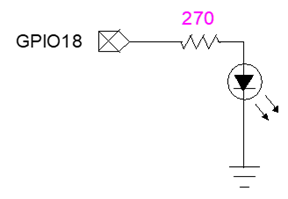



In [ ]:
#rpi_HTTP_GET_server.py
#라즈베리파이에 연결된 LED를 제어하는 HTTP GET 서버 프로그램

from http.server import HTTPServer, BaseHTTPRequestHandler
from urllib import parse
import RPi.GPIO as GP

#라즈베리파이 GPIO 설정
def setGPIO(pin, mode):
    GP.setmode(GP.BCM)
    GP.setwarnings(False)
    GP.setup(pin, mode)
    

In [ ]:
#GET request를 처리하는 프로토콜 클래스
class SimpleHTTPRequestHandler(BaseHTTPRequestHandler):
    
    def do_GET(self):
        #URL 분해
        parsed_path = parse.urlparse(self.path) 
        #query 분리
        msg = parsed_path.query 
        if msg == '': #query가 없으면 종료
            return
        
        #다중 query를 딕서너리로 분해
        parsed_query = parse.parse_qs(msg) 
        
        #query에 따라 LED 제어
        if parsed_query["led"][0] == "on":
            resp="LED is ON"
            GP.output(18, 1) #LED를 ON
        elif parsed_query["led"][0] == "off":
            resp="LED is OFF"
            GP.output(18, 0)#LED를 OFF
        else:
            resp="Fault" #요청 오류

        #헤더 전송
        self.send_response(200)
        self.send_header('Content-Type',
                         'text/plain; charset=utf-8')
        self.end_headers()
        
        #응답 메시지 전송
        self.wfile.write(resp.encode()) 


#GPIO 18을 출력으로 설정
setGPIO(18, GP.OUT) 
httpd = HTTPServer(('', 8080), SimpleHTTPRequestHandler)
httpd.serve_forever()

#### HTTP 클라이언트 프로그램
requests 모듈을 사용하여 라즈베리파이의 LED를 on/off 제어하는 프로그램
```
#query를 dictionary로 구성하여 get함수로 전달
payload = {'key1': 'value1', 'key2': 'value2'}
resp = requests.get(URL, params=payload)
```


In [ ]:
#requests_GET_Client.py
# requests 모듈을 이용한 GET request 프로그램

import requests

while True:
    setting = input("LED on? or off?: ")
    
    #서버로 request 전송
    #라즈베리파이 주소 = 192.168.0.2
    resp = requests.get("http://192.168.0.2:8080/", params = {"led": setting})
    print(resp.text) #라즈베리파이 응답

**[실행 방법]**  
라즈베리파이에 LED를 연결하고 서버 프로그램을 실행한다. PC에서 클라이언트 프로그램을 실행하여 라즈베리파이의 LED를 ON/OFF 제어해 본다

# MQTT 프로토콜

* 모바일 기기나 낮은 대역폭의 소형 디바이스에 최적화된 메시지전달 프로토콜
* IBM이 주도하여 개발하였고 OASIS란 민간 표준화 기구에서 표준화됨  
* MQTT 구성: 브로커 + 클라이언트(Publisher와 Subscriber)
* 클라이언트 기본 동작
  + connect
  + publish
  + subscribe

<MQTT의 구성과 동작>  
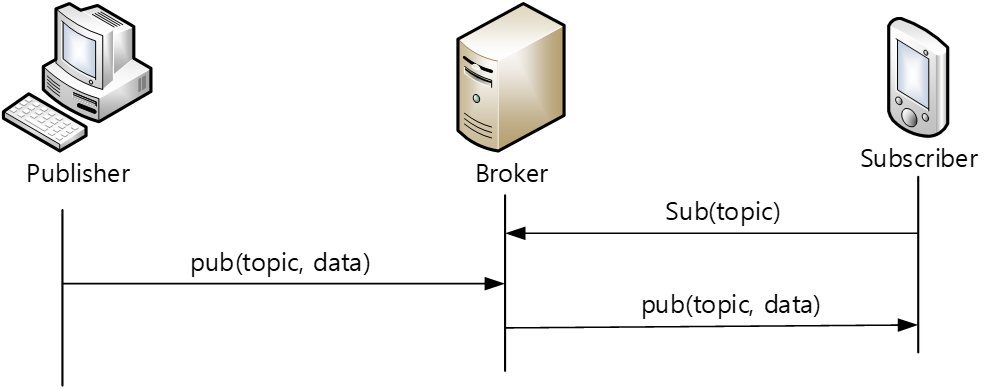

## MQTT 토픽(topic)
* 토픽은 메시지송수신의 기준이다. 
* '/'를 이용하여 계층 구조로 구성  
(1) 토픽은 단일 레벨로 지정  
    temperature  
(2) 단일 값을 다층 레벨로 지정  
    1층 거실의 온도 값을 토픽으로 지정  
    home/groundlevel/livingroom/temperature  
(3) +를 사용하여 1개의 레벨로 임의로 지정  
    1층에 있는 모든 방의 온도를 지정  
    home/groundlevel/+/temperature  
(4) #을 사용하여 다수의 레벨을 임의로 지정  
    1층에 있는 모든 센서값을 토픽으로 지정하는 경우  
    home/groundlevel/#

## MQTT 브로커(Broker)

클라이언트가 발행한 메시지를 다른 클라이언트로 전달하는 서버  
+ 클라우드 브로커: test.mosquitto.org  
+ 로컬 브로커: 모스키토(Mosquitto)

### 모스키토 브로커 설치와 사용법

(1) openSSL 설치  
    http://slproweb.com/products/Win32OpenSSL.html  
    
(2) 모스키토 설치  
    https://mosquitto.org/download/  
    
(3) 동적 라이브러리 추가 - .dll 파일을 모스키토 설치 폴더에 복사  
    ssleay32.dll  
    pthreadVC2.dll  
    libeay.dll  
    libgcc_s_dw2-1.dll  
    libwinpthread-1.dll  
    
(4) Visual C++ 2010 SP1 Redistributable Package 설치  

**모스키토 실행**  
1. 브로커 실행  
   c:>mosquitto -v
   
2. MQTT 구독 신청  
   c:>mosquitto_sub -h localhost -t /temp
   
3. MQTT 메시지 발행  
   c:>mosquitto_pub -h localhost -t /temp -m "안녕하세요"

# paho-mqtt 모듈을 사용한 MQTT 프로그래밍

**paho-matt 모듈**  
* MQTT 프로그래밍을 위한 클라이언트 모듈
+ MQTT 프로토콜 5.0, 3.1.1, 3.1 지원
* pip install paho-mqtt

paho-mqtt 모듈의 구조  
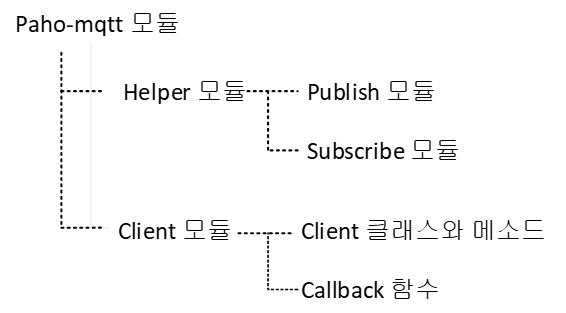

## Helper 모듈

### publish 모듈

publish 모듈은 단일 메시지나 다중 메시지를 발행하는 함수를 제공한다. 
* 단일 메시지 발행: single()  
```
single(topic, payload=None, qos=0, retain=False, hostname="localhost",port=1883, client_id="", keepalive=60, will=None, auth=None, tls=None,protocol=mqtt.MQTTv311, transport="tcp")
```
```
topic: 메시지 토픽
payload: 발행 메시지
hostname: 브로커 주소
port=1883 #MQTT 표준 포트번호는 1883이다
```  

+ 다중 메시지 발행: multiple()  
```
multiple(msgs, hostname="localhost", port=1883,client_id="", keepalive=60,will=None, auth=None, tls=None, protocol=mqtt.MQTTv311, transport="tcp")  
```
```
msgs: 발행할 메시지. dict 또는 tuple 형을 원소로 갖는 리스트로 지정한다.
```
```
dict형:  
msg = {'topic':"<topic>", 'payload':"<payload>", 'qos':<qos>, 'retain':<retain>}  
```
```
tuple형:  
("<topic>", "<payload>", qos, retain)
```

**단일 메시지 발행**

In [ ]:
#matt_publish_single.py
# publish.single() 함수를 사용한 단일 메시지 발행 프로그램

import paho.mqtt.publish as publish

topic = "mqtt/test" #토픽
payload = "Hello Everyone" #발행 메시지
broker = "test.mosquitto.org" #브로커 주소

publish.single(topic, payload, hostname=broker) #메시지 발행
print("message published")

**[실행 방법]**  
명령 창에서 C:>mosquitto_sub -h test.mosquitto.org -t mqtt/test를 먼저 실행하고 위 프로그램을 실행하면 명령 창에 “Hello Everyone” 메시지가 나타난다.

**[연습문제 13-2]**  
publish.single() 함수를 사용하여 자신이 사용하는 컴퓨터의 IP 주소를 publish 한 다음, 키보드에서 입력한 메시지를 publish 하는 프로그램을 작성하시오. 입력 메시지가 "q"이면 종료한다.

**다중 메시지 발행**

In [ ]:
#mqtt_publish_multiple.py
# 다중 메시지 발행 프로그램

import paho.mqtt.publish as publish
broker = "test.mosquitto.org"

msgs = [{'topic':"mqtt/multiple", 'payload':"Hello"},
    ("mqtt/multiple", "World", 0, False)]
publish.multiple(msgs, hostname=broker)

**[실행 방법]**  
명령 창에서 c:>mosquitto_sub -h test.mosquitto.org -t mqtt/multiple을 먼저 실행하고 위 프로그램을 실행하면 두 개의 메시지 “Hello”, “World”가 차례로 표시된다.

#### 스마트폰과 통신하는 MQTT GUI 프로그램

PC에서 메시지를 스마트폰으로 전송하는 GUI 프로그램  

컴퓨터 화면에 버튼을 하나 배치하고 버튼을 클릭하면 ON 또는 OFF 메시지를 MQTT 브로커로 전송하고 버튼의 색상은 ON/Red 또는 OFF/Blue로 변하도록 한다. 버튼은 토글 모두로 동작한다.  

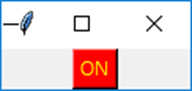 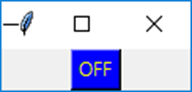


In [ ]:
#mqtt_button_send.py
#버튼 클릭으로 메시지를 발행하는 GUI 프로그램

import paho.mqtt.publish as publish
from tkinter import *

def change_color(): #버튼 클릭 콜백 함수
    #콜백 함수는 인자를 갖지 않으므로 필요하면 글로벌 변수를 선언하여 사용한다
    global button_bg, button_txt
    
    #토글 모드로 동작
    if button_bg == 'blue':
        button_bg='red'
        button_txt = 'ON'
    else:
        button_bg = 'blue'
        button_txt = 'OFF'
        
    #버튼 색상 및 택스트 변경
    button.configure(text = button_txt, bg=button_bg)
    #메시지 발행
    broker = "test.mosquitto.org"
    publish.single("control/LED", button_txt, hostname=broker)
    

In [ ]:
root = Tk()
button_bg='blue'
button_txt = 'OFF'

button = Button(root, text = button_txt, fg='yellow',
                font = ('Vernada', 16), bg=button_bg, command = change_color)
button.pack()
root.mainloop()

**[실행 방법]**  
스마트폰에서 MQTT Dashboard 앱을 실행하고 토픽을 “control/LED”로 설정한다. 위 프로그램을 실행하고 컴퓨터 화면의 ON/OFF 버튼을 클릭할 때마다 그림과 같이 MQTT Dashboard 앱에서 ON 또는 OFF 메시지가 수신되는지 확인한다.

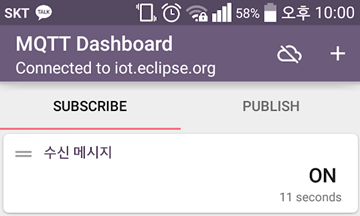

### subscribe 모듈

메시지 구독 함수를 제공하는 모듈이다. 블로킹 모드로 메시지를 수신하는 simple 함수와 넌 블로킹으로 수신하는 콜백 함수가 있다
+ 토픽을 등록하고 메시지 수신(blocking): simple()
```
simple(topics, qos=0, msg_count=1, retained=False, hostname="localhost",port=1883, client_id="", keepalive=60, will=None, auth=None, tls=None, protocol=mqtt.MQTTv311)
```
+ 토픽을 등록하고 콜백 함수를 지정하여 메시지 수신
```
callback(callback_ftn, topics, {other options})
callback_ftn: 메시지가 수신되면 실행되는 콜백함수
```

#### 간단한 메시지 구독 프로그램

In [ ]:
#mqtt_subscribe_simple.py
# 간단한 mqtt 메시지 구독 프로그램

import paho.mqtt.subscribe as subscribe

#다수 토픽 지정
topics = ['mqtt/test', 'TestTopic']
broker = "test.mosquitto.org"

#메시지 구독 신청
m = subscribe.simple(topics, hostname=broker,
                     retained=False, msg_count=1)

print('Topic: ', m.topic) #토픽
print('Message: ', m.payload.decode()) #메시지

**[실행 방법]**  
프로그램을 실행하고 명령창에서 c:>mosquitto_pub -h test.mosquitto.org -t mqtt/test -m "Hello MQTT"를 입력한다. 구독 프로그램 창에서 메시지가 수신되는지 확인하자

#### 메시지 수신 GUI 프로그램

MQTT 브로커로부터 MQTT 메시지를 수신하여 윈도우 화면에 표시하는 프로그램  

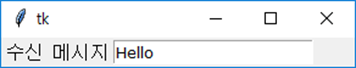

tkinter 루프는 데이터 송수신은 처리하지 못하므로 tkinter의 after() 함수를 이용하여 1초 마다 MQTT 메시지 수신한다

In [ ]:
#mqtt_button_subscribe.py
# 메시지를 구독하여 Entry 창에 표시하는 GUI 프로그램

import paho.mqtt.subscribe as subscribe
from tkinter import *

#메시지를 수신하여 Entry 창에 표시하는 함수
def Receiving():
    topics = 'control/msg'
    broker = "test.mosquitto.org"
    m=subscribe.simple(topics, hostname=broker, msg_count=1)
    entry.delete(0, END)
    entry.insert(1, m.payload.decode('utf-8'))

#1초 마다 Entry 창 갱신
def polling():
    Receiving()
    root.after(1000, polling) #1초 마다 다시 호출

root = Tk()
label1 = Label(root, font=('Verdana', 12), text="수신 메시지")
label1.grid(row=0, column=0)
entry = Entry(font=('Verdana', 10), width=20)
entry.grid(row=0, column=1)

polling()
root.mainloop()

**[실행 방법]**  
프로그램을 실행하고 명령창에서 mosquitto_pub -h test.mosquitto.org -t control/msg -m "Hello MQTT"를 입력한다

**[연습문제 13-3]**  
앞에서 설명한 메시지 수신 GUI 프로그램은 after() 함수를 이용하여 메시지 수신을 무한 반복 확인한다. after() 함수 대신 스레드를 이용하여 메시지를 수신하여 표시하도록 프로그램을 수정해 보시오.

#### callback() 함수를 사용한 메시지 수신하기

callback() 함수는 메시지가 수신될 때 실행될 콜백 함수를 미리 지정할 수 있다
```
callback(on_message, topics, qos=0, userdata=None, hostname="localhost", port=1883, client_id="", keepalive=60, will=None, auth=None, tls=None, protocol=mqtt.MQTTv311)
```
```
메시지가 수신되면 실행되는 콜백 함수 - 항상 3개의 인수를 가짐
on_message(client, userdata, message)
인수는 내부의 이벤트 루프에 의해 전달됨
```
```
client: path.mqtt.client.Client 클래스 객체
userdata: callback()의 userdata 인수
message: 수신 메시지의 토픽(message.topic)과 내용(message.payload)
```

In [ ]:
#mqtt_subscribe_callback.py
# callback() 함수를 이용한 메시지 구독 프로그램

import paho.mqtt.subscribe as subscribe

#메시지가 수신되면 실행되는 콜백 함수
def on_message(client, userdata, message):
    print("%s %s" % (message.topic, message.payload))

subscribe.callback(on_message, "mqtt/test",
                   hostname="test.mosquitto.org")

**[실행 방법]**  
프로그램을 실행하고 메시지를 발행하는 mqtt_publish_multiple.py 프로그램을 실행한다. 

## paho.mqtt.client 모듈을 이용한 메시지 송수신

paho.mqtt.client 모듈의 Client 클래스를 이용하면 MQTT 동작을 메서드로 수행할 수 있고, MQTT 이벤트는 콜백으로 처리할 수 있다. Client 객체의 속성을 이용하여 콜백 함수를 지정해두면 MQTT 이벤트가 발생했을 때 콜백 함수가 실행된다.

* Client 클래스 메서드
  * 재 초기화
    * reinitialize()
  * 브로커와 연결 및 해제 함수
    * connect()
    * reconnect()
    * disconnect()
  * Network loop 함수: MQTT 이벤트 관리 루프
    * loop(timeout=1.0)  
      이벤트 루프 실행. timeout 동안 블로킹됨  
    * loop_start()/loop_stop()  
      스레드를 실행하여 loop() 호출. 메인 스레드는 다른 작업 가능.  
      루프는 계속 실행됨  
    * loop_forever()  
      loop()가 블로킹 모드로 동작. disconnect()를 호출하면 종료  
  * 메시지 구독 신청 및 구독 해제 함수
    * subscribe()
    * unsubscribe()
  * 메시지 발행 함수
    * publish()

* 콜백 함수  
  + on_connect(client, userdata, flags, rc)
  + on_disconnect(client, userdata, rc)
  + on_message(client, userdata, message)
  + on_publish(client, userdata, mid)
  + on_subscribe(client, userdata, mid,granted_qos)
  + on_unsubscribe(client, userdata, mid)
  + on_log(client, userdata, level, buf)

### Client 클래스를 이용한 MQTT 메시지 송수신

Client 클래스를 이용하여 클라이언트 객체를 만들고 Client 메서드와 콜백 함수를 이용하여 메시지를 송수신한다. 

**client = mqtt.Client(client_id=””, clean_session=True, userdata=None, protocol=MQTTv311, transport=”tcp”)**  
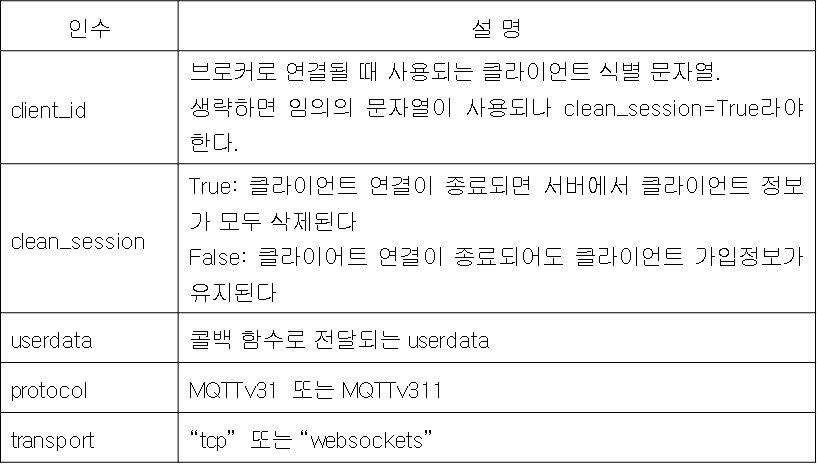

### Client 클래스를 이용한 송수신 프로그램 구조

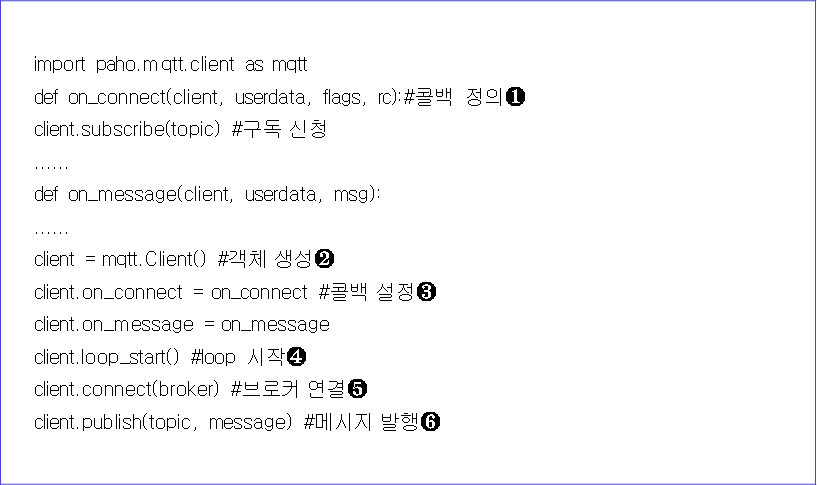

### Client 클래스를 이용한 메시지 수신 프로그램

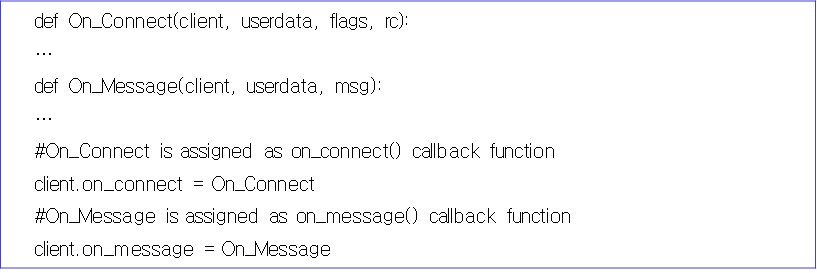

In [ ]:
#mqtt_client.py
# client 모듈을 이용한 메시지 구독 프로그램

import paho.mqtt.client as mqtt

# 브로커와 연결되면 실행되는 콜백
def On_Connect(client, userdata, flags, rc):
    print("Connected with result code "+str(rc))

    # 이 부분에서 구독 신청을 하면 연결이 끊어지더라도 재연결된다
    topic = "mqtt/test"
    client.subscribe(topic)

# 메시지가 도착하면 실행되는 콜백
def On_Message(client, userdata, msg):
    print(msg.topic+" "+str(msg.payload))

client = mqtt.Client() #클라이언트 객체 생성
client.on_connect = On_Connect #연결 콜백 지정
client.on_message = On_Message #메시지 콜백 지정

client.connect("test.mosquitto.org", 1883, 60) #브로커와 연결

# 이벤트 루프 실행
client.loop_forever()

**[실행 방법]**  
먼저 mqtt_client.py 프로그램을 실행하고, mqtt_publish_single.py 프로그램을 실행한다.

### Client 클래스를 이용한 메시지 발행 프로그램

publish()를 호출하고 메시지가 발행되면 on_publish 콜백이 실행되지만 메시지 발행 후 특별히 처리할 일이 없으면 일반적으로 이 콜백은 사용하지 않는다.

In [ ]:
#mqtt_client_publish.py
# client 모듈을 이용한 메시지 발행 프로그램

import paho.mqtt.client as mqtt

client = mqtt.Client() #클라이언트 객체 생성
client.connect("test.mosquitto.org", 1883, 60) #브로커와 연결
rc, mid = client.publish("mqtt/test", "Hello Everyone") #rc=응답 코드
print(str(rc)) #응답 코드 출력

**[실행 방법]**  
수신 프로그램인 mqtt_subscribe_simple.py를 실행하고, mqtt_client_publish.py를 실행하여 메시지가 수신되는지 확인한다.

**on_publish() 콜백 함수를 이용한 경우**

In [1]:
#mqtt_client_pub_callback.py
# client 모듈을 이용한 메시지 발행 프로그램

import paho.mqtt.client as client

broker="test.mosquitto.org"
port=1883

#메시지가 성공적으로 발행되면 호출되는 콜백
def on_publish(client1, user_data, mid):
    print("data published\n")
    pass

client1= client.Client() #클라이언트 객체 생성
client1.on_publish = on_publish #on_publish 속성에 콜백 함수 연결
client1.connect(broker, port) #브로커와 연결
ret= client1.publish("mqtt/test","Hello") #메시지 발송

data published



**[실행 방법]**  
수신 프로그램인 mqtt_client.py를 실행하고, mqtt_client_pub_callback.py를 실행하여 메시지가 수신되는지 확인한다.

## PC와 라즈베리파이의 MQTT 통신

라즈베리파이 GPIO23에 스위치를 연결하고 스위치의 상태를 읽어 브로커로 발행한다. PC에서는 subscribe 프로그램으로 라즈베리파이의 메시지를 읽어 화면에 ON 또는 OFF를 표시한다

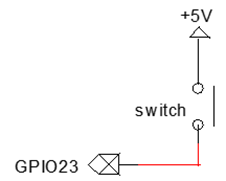

라즈베리파이에서 1초마다 스위치값을 읽고 스위치가 ON이면 “SWITCH ON” 메시지를 송신하고 OFF이면 “SWITCH OFF”를 송신한다.

**라즈베리파이 발행 프로그램**

In [ ]:
#rpi_mqtt_publish_1.py
# GPIO23에 연결된 스위치 상태를 읽어 메시지를 발행하는 프로그램

import paho.mqtt.publish as publish
import RPi.GPIO as GPIO
import time

topic = "RPi/SWITCH-1"
broker = "test.mosquitto.org"

#GPIO 설정
GPIO.setmode(GPIO.BCM)
GPIO.setup(23, GPIO.IN,pull_up_down=GPIO.PUD_DOWN) #GPIO23=입력모드

print("Checking SWITCH on GPIO23")
while True:
    led_state = GPIO.input(23) #스위치 상태 읽기
    if led_state == 1:
        msg = "SWITCH ON"
    else:
        msg = "SWITCH OFF"
        
    #스위치 상태 발행
    publish.single(topic, msg, hostname=broker)
    time.sleep(1) # 1초 후 다시 전송

**PC의 subscribe 프로그램**

In [ ]:
#rpi_mqtt_subscribe_1.py
# 라즈베리 파이가 발행하는 메시지를 구독하는 프로그램(PC용)

import paho.mqtt.subscribe as subscribe

topics = ['RPi/SWITCH-1'] #토픽
print('Topic: ', topics[0])
broker = "test.mosquitto.org"

while True:
    m = subscribe.simple(topics, hostname=broker,
                         retained=False, msg_count=1)
    print('Message: ', m.payload.decode())#라즈베리 파이의 메시지 출력

**[실행 방법]**  
PC에서 subscribe 프로그램을 실행하고 라즈베리파이에서 publish 프로그램을 실행한다. 라즈베리파이에 연결된 스위치를 변경하면서 스위치 상태가 PC에 표시되는지 확인한다

**[연습문제 13-4]**  
라즈베리파이 카메라 영상을 PC에서 보기  
https://medium.com/@pritam.mondal.0711/stream-live-video-from-client-to-server-using-opencv-and-paho-mqtt-674d3327e8b3

## MQTT를 이용한 라즈베리파이와 스마트폰 통신

라즈베리파이에서 MQTT subscribe 프로그램을 실행하고, 스마트폰에서 MQTT 대시보드 앱(MQTT Dash)으로 메시지를 송신하고 메시지 내용에 따라 라즈베리파이에 연결된 I/O 디바이스를 제어한다

### 스마트폰 MQTT 앱 설치하기
MQTT 메시지를 주고 받을 수 있는 'MQTT Dash'앱을 설치하고 설정하는 방법을 살펴보자
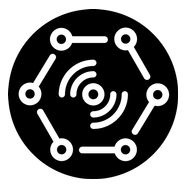
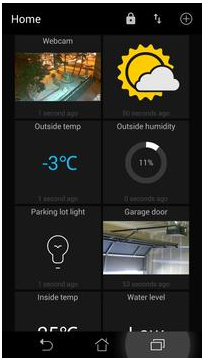
+ 교재를 참조하여 앱을 설치하고 설정한다(그림 13-26 ~ 13-40)

**[실행 확인]**  
+ PC에서 mqtt_publish.py를 실행하고 메시지를 발행하여 MQTT Dash 앱에서 메시지가 수신되는지 확인한다.  
+ MQTT Dash 앱에서 메시지를 발행하고 PC의 mqtt_subscribe_simple.py를 실행하여 메시지를 확인해보자 

### 라즈베리파이 모니터링과 제어

스마트폰에서 라즈베리파이의 입력 핀의 상태를 모니터링하거나 스마트폰에서 라즈베리파이에 연결된 LED를 ON/OFF하는 프로그램을 작성

#### 스마트폰에서 라즈베리파이 모니터링 하기

그림 13-25와 같이 스위치를 연결하고, MQTT Dash 앱의 Text UI(그림 13-40)에서 스위치 상태를 모니터링한다

In [ ]:
#rpi_mqtt_publish_2.py
#라즈베리 파이에 연결된 스위치 상태를 읽어 메시지를 발행하는 프로그램

import paho.mqtt.publish as publish
import RPi.GPIO as GPIO
import time

SWITCH = 23 #GPIO 23에 스위치 연결
broker = "test.mosquitto.org" #브로커 주소

#라즈베리 파이 설정
def Rpi_Set(): 
    GPIO.setmode(GPIO.BCM)
    GPIO.setup(SWITCH, GPIO.IN) #GPIO 23 = input mode
    GPIO.setwarnings(False)

#토픽 지정
topics = ['RPi/SWITCH'] 
print('Topic: ', topics[0])
Rpi_Set()

#스위치 상태를 읽어 메시지를 발행한다
while True:
    state = GPIO.input(SWITCH) #스위치 상태 읽기
    if state == 1: #스위치 ON
        msg = "ON"
    else: #스위치 OFF
        msg = "OFF"
        
    print("Switch is ", msg)
    publish.single(topics[0], msg, hostname=broker) #메시지 발행
    time.sleep(0.5)

**[실행 방법]**  
라즈베리파이에서 프로그램을 실행하고 스위치의 상태를 바꾸면서 라즈베리파이와 스마트폰에 표시되는 메시지를 확인한다.

#### 스마트폰에서 라즈베리파이 제어하기

라즈베리파이 출력 핀(GPIO18)에 연결된 LED를 스마트폰의 Switch example 항목(그림 13-40)에서 제어한다

In [ ]:
#rpi_mqtt_subscribe_2.py
# mqtt를 이용하여 GPIO18에 연결된 LED를 제어하는 구독 프로그램(라즈베리 파이)

import paho.mqtt.subscribe as subscribe
import RPi.GPIO as GPIO
import time

LED = 18 #GPIO18에 LED 연결

#GPIO 초기화
def Rpi_Set(): 
    GPIO.setmode(GPIO.BCM)
    GPIO.setup(LED, GPIO.OUT)
    GPIO.output(LED, GPIO.LOW) # 처음에는 LED OFF
    GPIO.setwarnings(False)

topics = ['RPi/LED']
print('Topic: ', topics[0])
Rpi_Set()

#메시지 구독 신청을 하고 수신 메시지에 따라 LED 제어
while True:
    #메시지 구독 신청
    m = subscribe.simple(topics,
            hostname="test.mosquitto.org", retained=False)
    r_msg = m.payload.decode() #수신 메시지
    print(m.topic+" "+ r_msg)
    
    #메시지에 따라 LED 제어
    if r_msg == "ON": # LED ON
        GPIO.output(LED, GPIO.HIGH)
    elif r_msg == "OFF": # LED OFF
        GPIO.output(LED, GPIO.LOW)
    else:
        print("Invalid message")
    time.sleep(0.5)

### 제어와 모니터링 통합 프로그램

라즈베리파이에서 2초마다 스위치의 상태를 읽어 RPi/SWITCH 토픽으로 발행한다. 또한 RPi/LED 토픽으로 수신한 메시지를 분석하여 메시지가 ON이면 LED를 켜고, OFF이면 LED를 끈다.

In [ ]:
#rpi_mqtt_sub_pub.py
# 메시지를 수신하여 LED를 제어하고,
# 스위치의 상태를 메시지로 송신하는 프로그램(라즈베리 파이)

import paho.mqtt.client as mqtt
import RPi.GPIO as GPIO
import time

LED = 18 #GPIO18 = LED
SWITCH = 23 #GPIO23 = 스위치
broker = "test.mosquitto.org" #MQTT 브로커 주소
# broker = "broker.hivemq.com"

def Rpi_Set():
    GPIO.setmode(GPIO.BCM)
    GPIO.setup(LED, GPIO.OUT)
    GPIO.setup(SWITCH, GPIO.IN)
    GPIO.output(LED, GPIO.LOW) # 초기에 LED OFF

#브로커와 연결되면 실행되는 콜백 함수
def On_Connect(client, userdata, flags, rc):
    print("Connected with result code "+str(rc))
    client.subscribe("RPi/LED")

# 메시지를 수신하면 실행되는 콜백 함수
def On_Message(client, userdata, msg):
    cmd = msg.payload.decode()
    print(msg.topic+" "+cmd)
    
    if cmd == "ON": # LED ON
        GPIO.output(LED, GPIO.HIGH)
    elif cmd == "OFF": # LED OFF
        GPIO.output(LED, GPIO.LOW)
    else:
        print("Invalid message")

In [ ]:
client = mqtt.Client() #클라이언트 객체 생성
client.on_connect = On_Connect #연결 콜백 함수 지정
client.on_message = On_Message #메시지 수신 콜백 함수 지정

client.connect(broker, 1883, 60) #브로커 연결
client.loop_start() #이벤트 루프 시작

while True:
    state = GPIO.input(SWITCH) #스위치 상태 읽기
    if state == 1:
        s_msg = "SWITCH ON"
    else:
        s_msg = "SWITCH OFF"
        
    client.publish("RPi/SWITCH", s_msg) #스위치 상태 메시지 발행
    time.sleep(2)

**[실행 방법]**  
라즈베리파이에서 프로그램을 실행하고, 스마트폰에서 스위치의 상태를 확인하고 LED를 제어해보자.(그림 13-41 ~ 13-43)

**[퀴즈]**  
위 프로그램에서 client.loop_start() 대신 client.loop_forever()를 사용할 수 없는 이유는 무엇인가?

### 라즈베리파이를 이용한 입력 펄스 카운터 모니터링

라즈베리파이를 이용하여 외부에서 입력되는 펄스를 카운팅하는 프로그램을 작성해 보자.  
+ 준비물
  + 라즈베리파이
  + 7400, 7447
  + 7-Segment 1개
  + 4.7Ohm 저항, 2개
  + 150Ohm 저항 4개
  + 푸쉬 스위치 1개

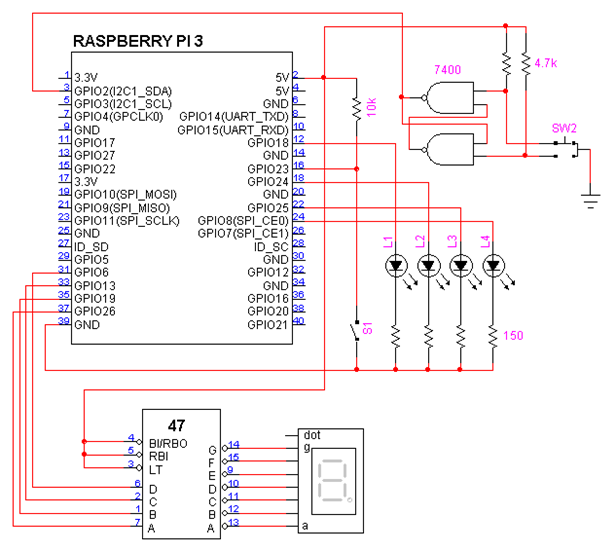

+ SW2를 한 번 클릭할 때마다 펄스가 하나씩 발생하고 펄스가 GPIO2에 입력된다.  
+ 입력된 펄스 수는 7-SEGMENT에 표시되도록 한다.  
+ 10개의 펄스가 입력되면 LED L1이 켜지고 프로그램이 종료된다. 
+ 입력된 펄스의 개수는 MQTT를 이용하여 발행되고, 스마트폰의 MQTT Dashboard 앱에서 구독한 펄스 수를 표시한다. 
+ 또 10개의 펄스가 입력되면 라즈베리파이에서 MQTT 브로커로 “FULL” 메시지를 발행한다. MQTT Dashboard 앱에서는 이 메시지를 구독하여 표시한다. 
+ 펄스의 개수는 “control/pulse” 토픽으로 발행하고, “FULL” 메시지는 “control/state” 토픽으로 발행한다.

In [ ]:
#rpi_pulse_count.py
#펄스 카운트 프로그램(라즈베리 파이)

import paho.mqtt.publish as publish
import RPi.GPIO as GPIO
import time

broker = "test.mosquitto.org"

#입력 신호에 에지 변화가 감지되면 호출되는 콜백
def mycallback(channel):
    global count, flag, SEG, topics
    
    count += 1
    if count == 10:
        flag = 0 #감지 중지
        GPIO.output(18, 1) #LED ON
        return
    
    print('Button {} pressed'.format(count))
    
    #7-segment에 표시하기 위해 4자리 2진수로 변환
    LEDbit = bin(count).split('b')[1].zfill(4)
    #7-segment에 펄스 수 표시
    for i in range(4):
        GPIO.output(SEG[i], int(LEDbit[i]))
        
    #펄스 수 메시지 발행
    publish.single(topics[0], str(count),
                   hostname=broker)
        

#GPIO 초기화
SEG = [26,19,13,6] #A4, A3, A2, A1 for 7-segment
GPIO.setmode(GPIO.BCM)
GPIO.setwarnings(False)
GPIO.setup(2, GPIO.IN) #펄스 입력 핀
GPIO.setup(18, GPIO.OUT) #LED를 출력모드로 설정
GPIO.output(18, 0) #LED OFF

#7-segment 연결 핀 초기화
for i in SEG: 
    GPIO.setup(i, GPIO.OUT)
    GPIO.output(i, 0) #처음에는 OFF

count = 0 #펄스 수
flag = 1 #flag = 0이 되면 감지를 중지한다

#메시지 구독 신청
topics = ['control/pulse', 'control/state']
publish.single(topics[0], "0", hostname=broker)
publish.single(topics[1], "Running", hostname=broker)

#2번 핀에서 상승 모서리 감지
GPIO.add_event_detect(2, GPIO.RISING, callback=mycallback)

while flag == 1: #신호 감지 계속
    continue

GPIO.remove_event_detect(2) #감지 해제
print('The END')

**[실행 방법]**  
라즈베리파이에서 프로그램을 실행하고 스마트폰에서 MATT dash 앱을 실행한다. 
스위치를 누르면서 7-Segment에 표시되는 값과 스마트폰 메시지를 확인한다.